# Coronavirus tweets NLP - Text Classification
Corona Virus Tagged Data

## Importing libraries

In [1]:
import re 
import string
import nltk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Documents\jupyter notebook DATA SCIENCE\Unsupervised Lerarning\Mypracise\NLP Project - Covid Tweets Sentiment Analysis\Corona_NLP_train.csv",encoding='latin1')

In [4]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
data.shape

(41157, 6)

## EDA

In [7]:
Location_sentiment = data.groupby('Location').count()['Sentiment'].sort_values(ascending=False).head(20)

In [8]:
Location_sentiment

Location
London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: Sentiment, dtype: int64

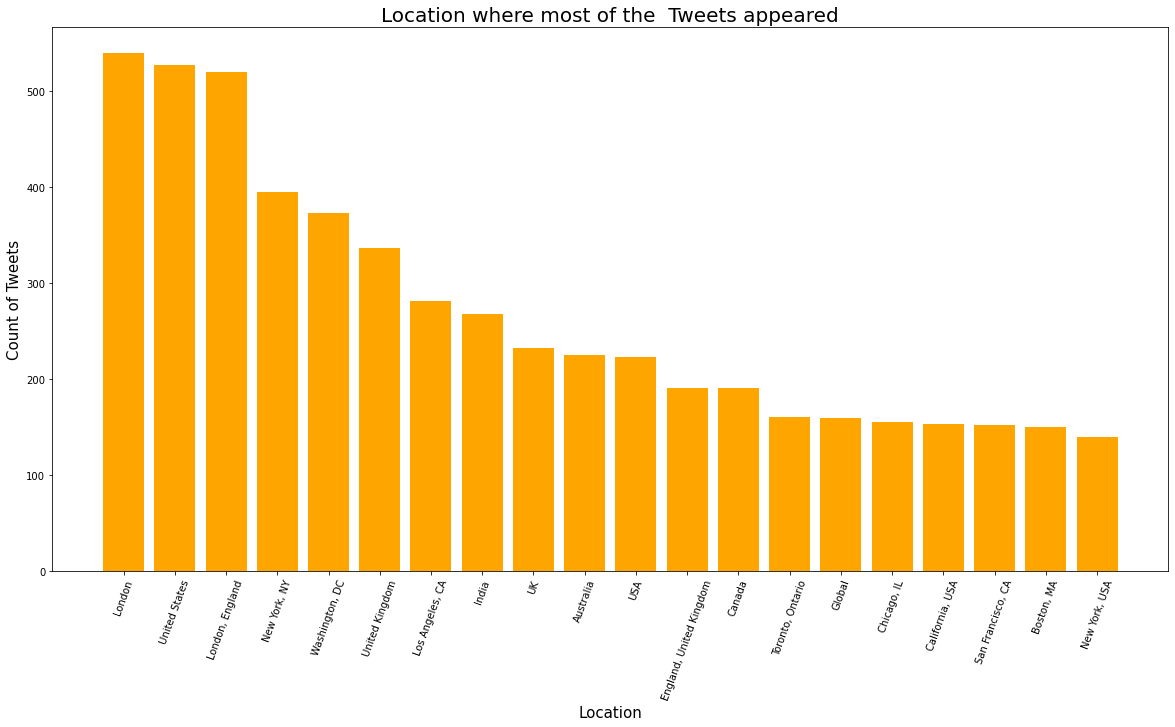

In [9]:
plt.figure(figsize=(20,10))
plt.bar(Location_sentiment.index,Location_sentiment,color='orange')
plt.xlabel("Location",fontsize=15)
plt.ylabel("Count of Tweets",fontsize=15)
plt.title("Location where most of the  Tweets appeared",fontsize=20)
plt.xticks(rotation=70)
plt.show()

In [10]:
data['TweetAt'].nunique()

30

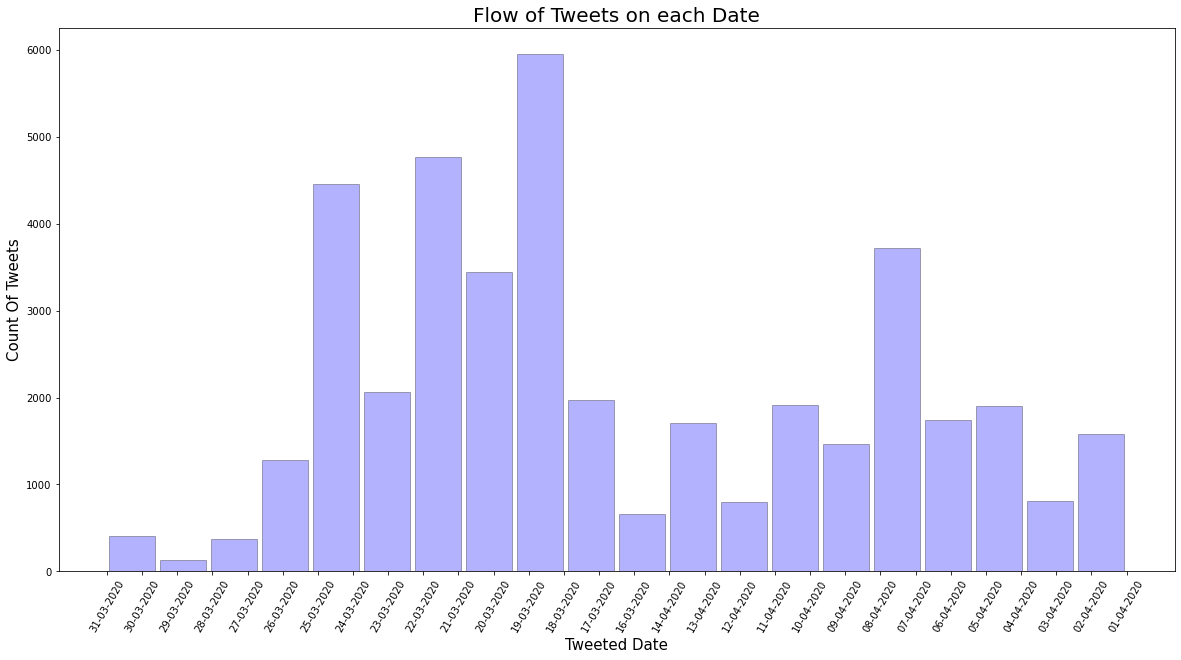

In [11]:
plt.figure(figsize=(20,10))
plt.hist(data['TweetAt'].sort_values(ascending=False),rwidth=0.9,alpha=0.3,color='blue',bins=20,edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel("Tweeted Date",fontsize=15)
plt.ylabel("Count Of Tweets",fontsize=15)
plt.title("Flow of Tweets on each Date",fontsize=20)
plt.show()


Percentage for each Sentiment 

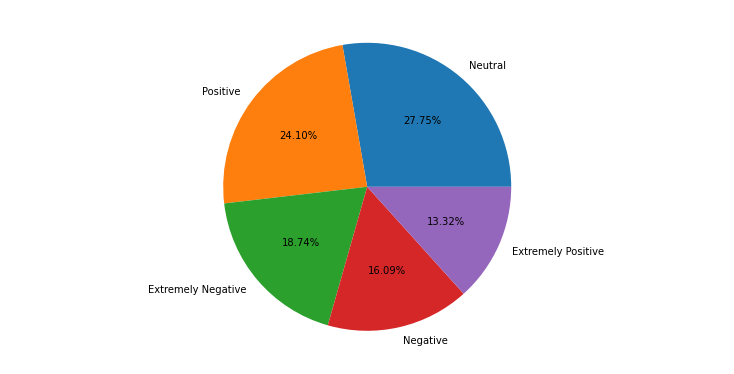

In [19]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['Sentiment'].value_counts(),labels=data['Sentiment'].unique(),autopct='%1.2f%%',explode=None)
plt.show()